# ***K-means clustring for a weather dataset***

***As with the daily weather data, this data comes from a weather station located in San Diego, California. The weather station is equipped with sensors that capture weather-related measurements such as air temperature, air pressure, and relative humidity. Data was collected for a period of three years, from September 2011 to September 2014, to ensure that sufficient data for different seasons and weather conditions is captured.***

### ***Dataset attributes***

***rowID: unique number for each row (Unit: NA)***
        
***hpwren_timestamp: timestamp of measure (Unit: year-month-day hour:minute:second)***
    
***air_pressure: air pressure measured at the timestamp (Unit: hectopascals)***
    
***air_temp: air temperature measure at the timestamp (Unit: degrees Fahrenheit)***

***avg_wind_direction: wind direction averaged over the minute before the timestamp (Unit: degrees, with 0 means coming from the North, and increasing clockwise)***

***avg_wind_speed: wind speed averaged over the minute before the timestamp (Unit: meters per second)***

***max_wind_direction: highest wind direction in the minute before the timestamp (Unit: degrees, with 0 being North and increasing clockwise)***

***max_wind_speed: highest wind speed in the minute before the timestamp (Unit: meters per second)***

***min_wind_direction: smallest wind direction in the minute before the timestamp (Unit: degrees, with 0 being North and inceasing clockwise)***

***min_wind_speed: smallest wind speed in the minute before the timestamp (Unit: meters per second)***

***rain_accumulation: amount of accumulated rain measured at the timestamp (Unit: millimeters)***

***rain_duration: length of time rain has fallen as measured at the timestamp (Unit: seconds)***

***relative_humidity: relative humidity measured at the timestamp (Unit: percent)***

In [1]:
#importing the required libraries
import pandas as pd
import numpy as np 
import seaborn as snb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('D:\minute_weather.csv')
data

rowID     hpwren_timestamp  air_pressure  air_temp  \
0              0  2011-09-10 00:00:49         912.3     64.76   
1              1  2011-09-10 00:01:49         912.3     63.86   
2              2  2011-09-10 00:02:49         912.3     64.22   
3              3  2011-09-10 00:03:49         912.3     64.40   
4              4  2011-09-10 00:04:49         912.3     64.40   
...          ...                  ...           ...       ...   
1587252  1587252  2014-09-10 23:55:29         915.9     74.66   
1587253  1587253  2014-09-10 23:56:29         915.9     74.66   
1587254  1587254  2014-09-10 23:57:29         915.9     74.66   
1587255  1587255  2014-09-10 23:58:29         915.9     74.66   
1587256  1587256  2014-09-10 23:59:29         915.9     74.66   

         avg_wind_direction  avg_wind_speed  max_wind_direction  \
0                      97.0             1.2               106.0   
1                     161.0             0.8               215.0   
2                      77.0             0.7               143.0   
3                      89.0             1.2               112.0   
4                     185.0             0.4               260.0   
...                     ...             ...                 ...   
1587252                 1.0             1.8                11.0   
1587253                 9.0             1.6                19.0   
1587254                15.0             1.7                42.0   
1587255                 8.0             1.8                24.0   
1587256                12.0             1.9                21.0   

         max_wind_speed  min_wind_direction  min_wind_speed  \
0                   1.6                85.0             1.0   
1                   1.5                43.0             0.2   
2                   1.2               324.0             0.3   
3                   1.6                12.0             0.7   
4                   1.0               100.0             0.1   
...                 ...                 ...             ...   
1587252             2.1               357.0             1.6   
1587253             1.8               353.0             1.4   
1587254             2.3               353.0             1.2   
1587255             2.2               355.0             1.4   
1587256             2.2               357.0             1.5   

         rain_accumulation  rain_duration  relative_humidity  
0                      NaN            NaN               60.5  
1                      0.0            0.0               39.9  
2                      0.0            0.0               43.0  
3                      0.0            0.0               49.5  
4                      0.0            0.0               58.8  
...                    ...            ...                ...  
1587252                0.0            0.0               46.3  
1587253                0.0            0.0               46.2  
1587254                0.0            0.0               46.3  
1587255                0.0            0.0               46.2  
1587256                0.0            0.0               46.3  

[1587257 rows x 13 columns]

In [3]:
#data is too big (more than one milion row) ,so we will take a sample
data = data[(data['rowID'] % 10) == 0]
data

rowID     hpwren_timestamp  air_pressure  air_temp  \
0              0  2011-09-10 00:00:49         912.3     64.76   
10            10  2011-09-10 00:10:49         912.3     62.24   
20            20  2011-09-10 00:20:49         912.2     63.32   
30            30  2011-09-10 00:30:49         912.2     62.60   
40            40  2011-09-10 00:40:49         912.2     64.04   
...          ...                  ...           ...       ...   
1587210  1587210  2014-09-10 23:13:29         915.9     75.56   
1587220  1587220  2014-09-10 23:23:29         915.9     75.56   
1587230  1587230  2014-09-10 23:33:29         915.9     75.56   
1587240  1587240  2014-09-10 23:43:29         915.9     75.20   
1587250  1587250  2014-09-10 23:53:29         915.9     74.84   

         avg_wind_direction  avg_wind_speed  max_wind_direction  \
0                      97.0             1.2               106.0   
10                    144.0             1.2               167.0   
20                    100.0             2.0               122.0   
30                     91.0             2.0               103.0   
40                     81.0             2.6                88.0   
...                     ...             ...                 ...   
1587210               330.0             1.0               341.0   
1587220               330.0             1.1               341.0   
1587230               344.0             1.4               352.0   
1587240               359.0             1.3                 9.0   
1587250                 6.0             1.5                20.0   

         max_wind_speed  min_wind_direction  min_wind_speed  \
0                   1.6                85.0             1.0   
10                  1.8               115.0             0.6   
20                  2.5                91.0             1.5   
30                  2.4                71.0             1.4   
40                  2.9                68.0             1.4   
...                 ...                 ...             ...   
1587210             1.3               310.0             0.8   
1587220             1.4               316.0             0.9   
1587230             1.7               338.0             1.2   
1587240             1.6               347.0             1.0   
1587250             1.9               349.0             1.1   

         rain_accumulation  rain_duration  relative_humidity  
0                      NaN            NaN               60.5  
10                     0.0            0.0               38.5  
20                     0.0            0.0               58.3  
30                     0.0            0.0               57.9  
40                     0.0            0.0               57.4  
...                    ...            ...                ...  
1587210                0.0            0.0               47.8  
1587220                0.0            0.0               48.0  
1587230                0.0            0.0               48.0  
1587240                0.0            0.0               46.3  
1587250                0.0            0.0               46.1  

[158726 rows x 13 columns]

**let us sample down by taking every 10th row.**

In [4]:
#dropping id and time columns
data.drop('rowID',axis=1,inplace=True)
data.drop('hpwren_timestamp',axis=1,inplace=True)

In [5]:
data.head(15)

air_pressure  air_temp  avg_wind_direction  avg_wind_speed  \
0           912.3     64.76                97.0             1.2   
10          912.3     62.24               144.0             1.2   
20          912.2     63.32               100.0             2.0   
30          912.2     62.60                91.0             2.0   
40          912.2     64.04                81.0             2.6   
50          912.1     63.68               102.0             1.2   
60          912.0     64.04                83.0             0.7   
70          911.9     64.22                82.0             2.0   
80          911.9     61.70                67.0             3.3   
90          911.9     61.34                67.0             3.6   
100         911.8     62.96                95.0             2.3   
110         911.8     64.22                83.0             2.1   
120         911.8     63.86                68.0             2.1   
130         911.6     64.40               156.0             0.5   
140         911.5     65.30                85.0             2.2   

     max_wind_direction  max_wind_speed  min_wind_direction  min_wind_speed  \
0                 106.0             1.6                85.0             1.0   
10                167.0             1.8               115.0             0.6   
20                122.0             2.5                91.0             1.5   
30                103.0             2.4                71.0             1.4   
40                 88.0             2.9                68.0             1.4   
50                119.0             1.5                92.0             1.0   
60                101.0             0.9                73.0             0.5   
70                 97.0             2.4                69.0             1.7   
80                 70.0             3.5                63.0             3.1   
90                 75.0             4.2                62.0             3.1   
100               106.0             2.5                88.0             1.9   
110                88.0             2.5                80.0             1.6   
120                76.0             2.4                62.0             1.8   
130               203.0             0.7               119.0             0.3   
140                92.0             2.5                72.0             2.0   

     rain_accumulation  rain_duration  relative_humidity  
0                  NaN            NaN               60.5  
10                 0.0            0.0               38.5  
20                 0.0            0.0               58.3  
30                 0.0            0.0               57.9  
40                 0.0            0.0               57.4  
50                 0.0            0.0               51.4  
60                 0.0            0.0               51.4  
70                 0.0            0.0               62.2  
80                 0.0            0.0               71.5  
90                 0.0            0.0               72.5  
100                0.0            0.0               63.9  
110                0.0            0.0               59.1  
120                0.0            0.0               63.5  
130                0.0            0.0               50.4  
140                0.0            0.0               58.0

In [6]:
data.shape

(158726, 11)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158726 entries, 0 to 1587250
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   air_pressure        158726 non-null  float64
 1   air_temp            158726 non-null  float64
 2   avg_wind_direction  158680 non-null  float64
 3   avg_wind_speed      158680 non-null  float64
 4   max_wind_direction  158680 non-null  float64
 5   max_wind_speed      158680 non-null  float64
 6   min_wind_direction  158680 non-null  float64
 7   min_wind_speed      158680 non-null  float64
 8   rain_accumulation   158725 non-null  float64
 9   rain_duration       158725 non-null  float64
 10  relative_humidity   158726 non-null  float64
dtypes: float64(11)
memory usage: 14.5 MB


***There are missing values to be dealt with***

In [8]:
data['avg_wind_direction'].fillna(value = data.avg_wind_direction.mean(), inplace = True)

In [9]:
data['avg_wind_speed'].fillna(value = data.avg_wind_speed.mean(), inplace = True)

In [10]:
data['max_wind_direction'].fillna(value = data.max_wind_direction.mean(), inplace = True)

In [11]:
data['max_wind_speed'].fillna(value = data.max_wind_speed.mean(), inplace = True)

In [12]:
data['min_wind_direction'].fillna(value = data.min_wind_direction.mean(), inplace = True)

In [13]:
data['min_wind_speed'].fillna(value = data.min_wind_speed.mean(), inplace = True)

In [14]:
data['rain_accumulation'].fillna(value = data.rain_accumulation.mean(), inplace = True)

In [15]:
data['rain_duration'].fillna(value = data.rain_duration.mean(), inplace = True)

In [16]:
data.describe()

air_pressure       air_temp  avg_wind_direction  avg_wind_speed  \
count  158726.000000  158726.000000       158726.000000   158726.000000   
mean      916.830161      61.851589          162.156100        2.775215   
std         3.051717      11.833569           95.264394        2.057326   
min       905.000000      31.640000            0.000000        0.000000   
25%       914.800000      52.700000           62.000000        1.300000   
50%       916.700000      62.240000          182.000000        2.200000   
75%       918.700000      70.880000          217.000000        3.800000   
max       929.500000      99.500000          359.000000       31.900000   

       max_wind_direction  max_wind_speed  min_wind_direction  min_wind_speed  \
count       158726.000000   158726.000000       158726.000000   158726.000000   
mean           163.462144        3.400558          166.774017        2.134664   
std             92.438741        2.418451           97.426988        1.741860   
min              0.000000        0.100000            0.000000        0.000000   
25%             68.000000        1.600000           76.000000        0.800000   
50%            187.000000        2.700000          180.000000        1.600000   
75%            223.000000        4.600000          212.000000        3.000000   
max            359.000000       36.000000          359.000000       31.600000   

       rain_accumulation  rain_duration  relative_humidity  
count      158726.000000  158726.000000      158726.000000  
mean            0.000318       0.409627          47.609470  
std             0.011236       8.665495          26.214409  
min             0.000000       0.000000           0.900000  
25%             0.000000       0.000000          24.700000  
50%             0.000000       0.000000          44.700000  
75%             0.000000       0.000000          68.000000  
max             3.120000    2960.000000          93.000000

In [17]:
data.duplicated().sum()

3252

In [18]:
data.drop_duplicates(inplace=True)

In [19]:
data.duplicated().sum()

0

In [20]:
def detectOutliers(x):
    
    plt.figure(figsize=(16,5))
    plt.show()
    snb.boxplot(data[x])

In [21]:
arr=data.columns

In [22]:
arr

Index(['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed',
       'max_wind_direction', 'max_wind_speed', 'min_wind_direction',
       'min_wind_speed', 'rain_accumulation', 'rain_duration',
       'relative_humidity'],
      dtype='object')

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

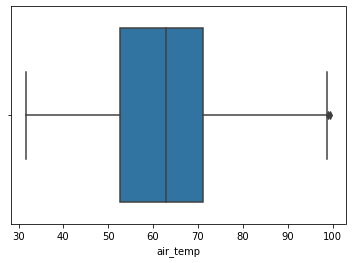

<Figure size 1152x360 with 0 Axes>

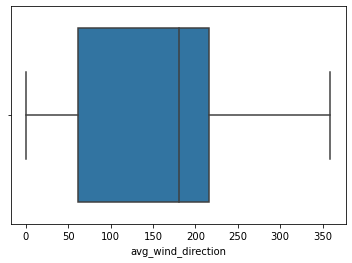

<Figure size 1152x360 with 0 Axes>

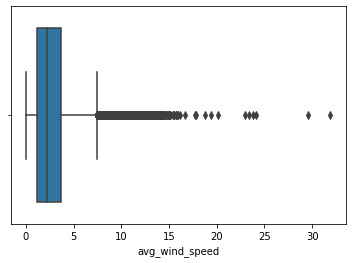

<Figure size 1152x360 with 0 Axes>

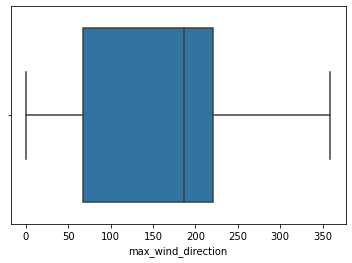

<Figure size 1152x360 with 0 Axes>

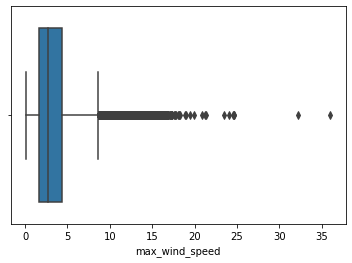

<Figure size 1152x360 with 0 Axes>

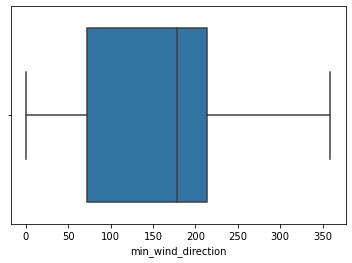

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

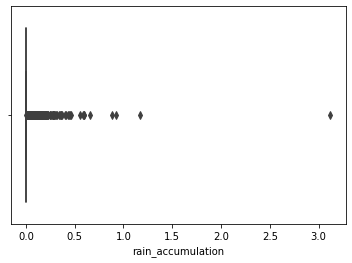

<Figure size 1152x360 with 0 Axes>

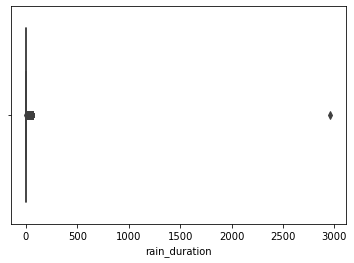

<Figure size 1152x360 with 0 Axes>

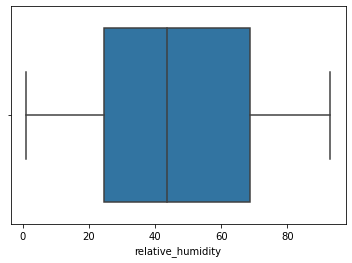

In [23]:
for i in arr:    
    detectOutliers(i)   

In [24]:
#Drop column rain_duration and rain_accumulation
data.drop('rain_duration',axis=1,inplace=True)
data.drop('rain_accumulation',axis=1,inplace=True)

**There 2 columns(rain_duration,rain_accumulation) with noisy data that must be dropped**

In [25]:
#function to remove outliers
def removeOutliers(data,g):
    for i in g:
        if(i=='rain_duration' or i=='rain_accumulation'):
            continue
        percentile25 = data[i].quantile(0.25)
        percentile75 = data[i].quantile(0.75)
        iqr=percentile75-percentile25
        upper_limit = percentile75 + 1.5 * iqr
        lower_limit = percentile25 - 1.5 * iqr
        data=data[(data[i]>lower_limit)&(data[i]<upper_limit)]
    return data 

In [26]:
#removing outliers
data=removeOutliers(data,arr) 
data

air_pressure  air_temp  avg_wind_direction  avg_wind_speed  \
0               912.3     64.76                97.0             1.2   
10              912.3     62.24               144.0             1.2   
20              912.2     63.32               100.0             2.0   
30              912.2     62.60                91.0             2.0   
40              912.2     64.04                81.0             2.6   
...               ...       ...                 ...             ...   
1587210         915.9     75.56               330.0             1.0   
1587220         915.9     75.56               330.0             1.1   
1587230         915.9     75.56               344.0             1.4   
1587240         915.9     75.20               359.0             1.3   
1587250         915.9     74.84                 6.0             1.5   

         max_wind_direction  max_wind_speed  min_wind_direction  \
0                     106.0             1.6                85.0   
10                    167.0             1.8               115.0   
20                    122.0             2.5                91.0   
30                    103.0             2.4                71.0   
40                     88.0             2.9                68.0   
...                     ...             ...                 ...   
1587210               341.0             1.3               310.0   
1587220               341.0             1.4               316.0   
1587230               352.0             1.7               338.0   
1587240                 9.0             1.6               347.0   
1587250                20.0             1.9               349.0   

         min_wind_speed  relative_humidity  
0                   1.0               60.5  
10                  0.6               38.5  
20                  1.5               58.3  
30                  1.4               57.9  
40                  1.4               57.4  
...                 ...                ...  
1587210             0.8               47.8  
1587220             0.9               48.0  
1587230             1.2               48.0  
1587240             1.0               46.3  
1587250             1.1               46.1  

[142606 rows x 9 columns]

In [27]:
158726 -146032

12694

**There are 12,694 rows removed (marked as outliers)**

<Figure size 1152x360 with 0 Axes>

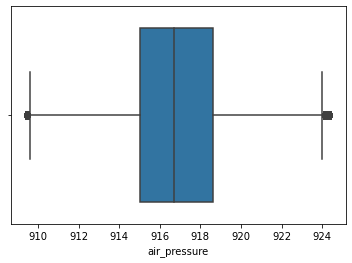

<Figure size 1152x360 with 0 Axes>

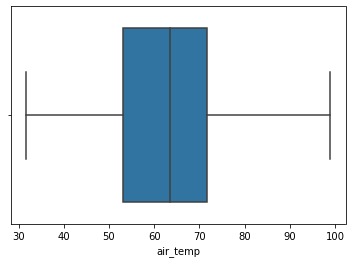

<Figure size 1152x360 with 0 Axes>

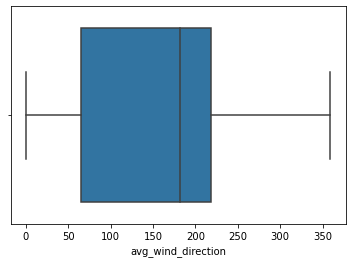

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

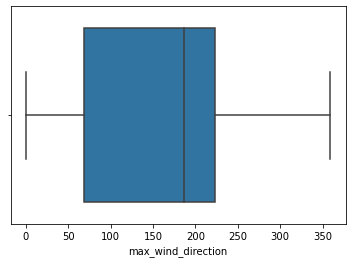

<Figure size 1152x360 with 0 Axes>

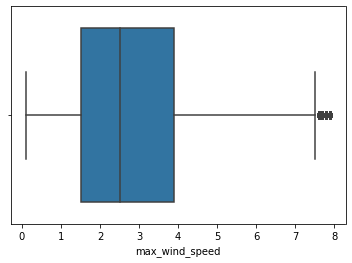

<Figure size 1152x360 with 0 Axes>

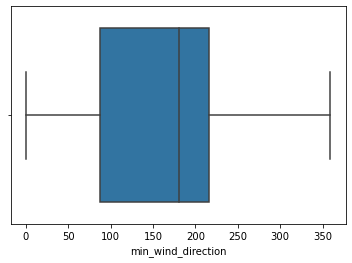

<Figure size 1152x360 with 0 Axes>

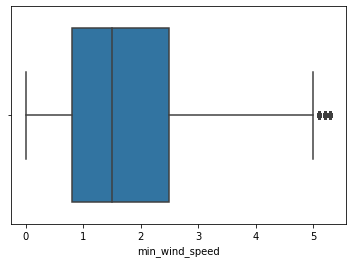

<Figure size 1152x360 with 0 Axes>

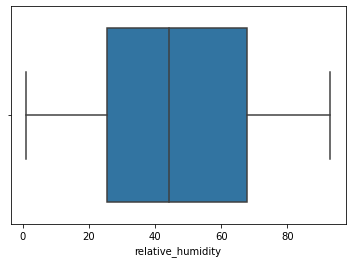

In [28]:
for i in data.columns:    
    detectOutliers(i)  

In [29]:
data.describe()

air_pressure       air_temp  avg_wind_direction  avg_wind_speed  \
count  142606.000000  142606.000000       142606.000000   142606.000000   
mean      916.875400      62.567678          163.952659        2.315355   
std         2.722529      11.834026           96.631509        1.452799   
min       909.400000      31.640000            0.000000        0.000000   
25%       915.000000      53.060000           65.000000        1.200000   
50%       916.700000      63.500000          182.000000        2.000000   
75%       918.600000      71.600000          218.000000        3.200000   
max       924.400000      98.960000          359.000000        7.200000   

       max_wind_direction  max_wind_speed  min_wind_direction  min_wind_speed  \
count       142606.000000   142606.000000       142606.000000   142606.000000   
mean           164.286519        2.855097          169.933664        1.760986   
std             93.997611        1.694776           98.220948        1.254604   
min              0.000000        0.100000            0.000000        0.000000   
25%             69.000000        1.500000           87.000000        0.800000   
50%            186.000000        2.500000          180.000000        1.500000   
75%            223.000000        3.900000          216.000000        2.500000   
max            359.000000        7.900000          359.000000        5.300000   

       relative_humidity  
count      142606.000000  
mean           47.584252  
std            25.788604  
min             0.900000  
25%            25.300000  
50%            44.200000  
75%            67.800000  
max            93.000000

In [30]:
#missing values?
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142606 entries, 0 to 1587250
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   air_pressure        142606 non-null  float64
 1   air_temp            142606 non-null  float64
 2   avg_wind_direction  142606 non-null  float64
 3   avg_wind_speed      142606 non-null  float64
 4   max_wind_direction  142606 non-null  float64
 5   max_wind_speed      142606 non-null  float64
 6   min_wind_direction  142606 non-null  float64
 7   min_wind_speed      142606 non-null  float64
 8   relative_humidity   142606 non-null  float64
dtypes: float64(9)
memory usage: 10.9 MB


**No missing values**

Text(0.5, 1.0, 'Correlation Matrix')

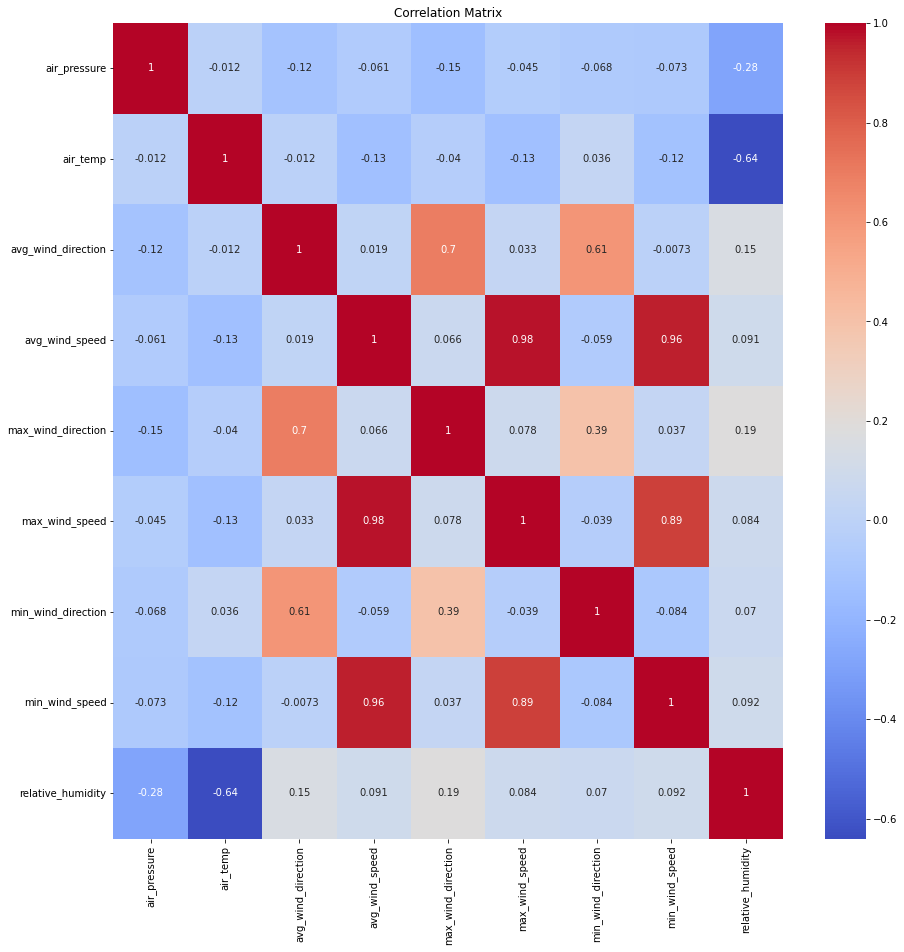

In [31]:
#correaltion Matrix
plt.figure(figsize=(15,15))
snb.heatmap(data.corr(), annot=True, cmap="coolwarm").set_title('Correlation Matrix')

***There are attributes with correlation more than 0.8 ,needs to be dropped***

In [32]:
#dropping Min and Max wind speed columns 
data.drop('max_wind_speed',axis=1,inplace=True)
data.drop('min_wind_speed',axis=1,inplace=True)

**we will use avg_wind_speed in our algortithm**

In [33]:
data

air_pressure  air_temp  avg_wind_direction  avg_wind_speed  \
0               912.3     64.76                97.0             1.2   
10              912.3     62.24               144.0             1.2   
20              912.2     63.32               100.0             2.0   
30              912.2     62.60                91.0             2.0   
40              912.2     64.04                81.0             2.6   
...               ...       ...                 ...             ...   
1587210         915.9     75.56               330.0             1.0   
1587220         915.9     75.56               330.0             1.1   
1587230         915.9     75.56               344.0             1.4   
1587240         915.9     75.20               359.0             1.3   
1587250         915.9     74.84                 6.0             1.5   

         max_wind_direction  min_wind_direction  relative_humidity  
0                     106.0                85.0               60.5  
10                    167.0               115.0               38.5  
20                    122.0                91.0               58.3  
30                    103.0                71.0               57.9  
40                     88.0                68.0               57.4  
...                     ...                 ...                ...  
1587210               341.0               310.0               47.8  
1587220               341.0               316.0               48.0  
1587230               352.0               338.0               48.0  
1587240                 9.0               347.0               46.3  
1587250                20.0               349.0               46.1  

[142606 rows x 7 columns]

In [34]:
#Scale the Features using StandardScaler (normalize data before applying Kmeans)
X = StandardScaler().fit_transform(data)
X

array([[-1.68057596,  0.18525643, -0.69286814, ..., -0.62008728,
        -0.8647235 ,  0.50083338],
       [-1.68057596, -0.02768961, -0.20648264, ...,  0.02886765,
        -0.5592886 , -0.35225961],
       [-1.71730665,  0.06357298, -0.66182226, ..., -0.44986959,
        -0.80363652,  0.41552408],
       ...,
       [-0.35827116,  1.0978823 ,  1.8632429 , ...,  1.99700967,
         1.7111108 ,  0.01612145],
       [-0.35827116,  1.06746144,  2.01847232, ..., -1.65203202,
         1.80274127, -0.04979937],
       [-0.35827116,  1.03704058, -1.63459326, ..., -1.53500735,
         1.8231036 , -0.05755476]])

In [35]:
#using k-means clustring
kmeans = KMeans(n_clusters=4)
model = kmeans.fit(X)
print("model\n", model)

model
 KMeans(n_clusters=4)


In [36]:
#The centers of 12 clusters we formed
centers = model.cluster_centers_
centers

array([[ 0.26135577,  0.31125555, -0.20184284, -0.57088972, -1.33366682,
         1.63475106, -0.39284648],
       [-0.02784758,  0.61679517,  0.56708559, -0.02029111,  0.73837319,
         0.32992965, -0.46406805],
       [ 0.38306148,  0.07990691, -1.14419995, -0.09123138, -1.02711564,
        -1.3282573 , -0.41823243],
       [-0.43482226, -1.0333459 ,  0.41761303,  0.33918833,  0.51610032,
         0.19689656,  1.18563373]])

In [37]:
# Function that creates a DataFrame with a column for Cluster Number

def pd_centers(featuresUsed, centers):
    colNames = list(featuresUsed)
    #adding a new column to the dataset
    colNames.append('prediction')

    # Zip with a column called 'prediction' (index)
    #A list of elements of centers with their indices are saved as Z
    Z = [np.append(A, index) for index, A in enumerate(centers)]

    # Convert to pandas data frame for plotting
    #prediction column is converted to int type and P as the ultimate dataframe is returned. this prediction column is the cluster number
    P = pd.DataFrame(Z, columns=colNames)
    P['prediction'] = P['prediction'].astype(int)
    return P

In [38]:
P = pd_centers(data, centers)
P

air_pressure  air_temp  avg_wind_direction  avg_wind_speed  \
0      0.261356  0.311256           -0.201843       -0.570890   
1     -0.027848  0.616795            0.567086       -0.020291   
2      0.383061  0.079907           -1.144200       -0.091231   
3     -0.434822 -1.033346            0.417613        0.339188   

   max_wind_direction  min_wind_direction  relative_humidity  prediction  
0           -1.333667            1.634751          -0.392846           0  
1            0.738373            0.329930          -0.464068           1  
2           -1.027116           -1.328257          -0.418232           2  
3            0.516100            0.196897           1.185634           3

In [39]:
pred = kmeans.predict(X)
pred=pd.DataFrame(pred) 
pred.rename(columns = {0:'Cluster'}, inplace = True)
pred

Cluster
0             2
1             1
2             2
3             2
4             2
...         ...
142601        1
142602        1
142603        1
142604        0
142605        0

[142606 rows x 1 columns]

In [40]:
data=data.reset_index()

In [41]:
data['Cluster']=pred
data

index  air_pressure  air_temp  avg_wind_direction  avg_wind_speed  \
0             0         912.3     64.76                97.0             1.2   
1            10         912.3     62.24               144.0             1.2   
2            20         912.2     63.32               100.0             2.0   
3            30         912.2     62.60                91.0             2.0   
4            40         912.2     64.04                81.0             2.6   
...         ...           ...       ...                 ...             ...   
142601  1587210         915.9     75.56               330.0             1.0   
142602  1587220         915.9     75.56               330.0             1.1   
142603  1587230         915.9     75.56               344.0             1.4   
142604  1587240         915.9     75.20               359.0             1.3   
142605  1587250         915.9     74.84                 6.0             1.5   

        max_wind_direction  min_wind_direction  relative_humidity  Cluster  
0                    106.0                85.0               60.5        2  
1                    167.0               115.0               38.5        1  
2                    122.0                91.0               58.3        2  
3                    103.0                71.0               57.9        2  
4                     88.0                68.0               57.4        2  
...                    ...                 ...                ...      ...  
142601               341.0               310.0               47.8        1  
142602               341.0               316.0               48.0        1  
142603               352.0               338.0               48.0        1  
142604                 9.0               347.0               46.3        0  
142605                20.0               349.0               46.1        0  

[142606 rows x 9 columns]

In [42]:
#printing number of points in each cluster
data['Cluster'] = pd.DataFrame(pred, columns=['Cluster'] )
print('Number of data points in each cluster= \n', data['Cluster'].value_counts())

Number of data points in each cluster= 
 1    51940
3    38478
2    37143
0    15045
Name: Cluster, dtype: int64
